In [ ]:
from google.colab import files

# Upload the files
uploaded = files.upload()

Saving utils.py to utils.py


In [ ]:
import os

# List files in the current directory
print(os.listdir())

['.config', 'gcnLayer.py', 'mt.py', 'adjacency.csv', 'dataLoad.py', 'sample_data']


# 10 **MINS**

X_train_1.shape,Y_train.shape
(2330, 276, 30) (2330, 276)
X_test_1.shape,Y_test.shape
(170, 276, 30) (170, 276)
Y_test_original.shape
(170, 276)
3188 0
(2330, 276, 30)
(170, 276, 30)
Adjacency shape: (276, 276)


Model compiled
Epoch 1/10
37/37 [==============================] - 6s 22ms/step - loss: 0.0331
Epoch 2/10
37/37 [==============================] - 1s 17ms/step - loss: 0.0181
Epoch 3/10
37/37 [==============================] - 1s 15ms/step - loss: 0.0151
Epoch 4/10
37/37 [==============================] - 1s 14ms/step - loss: 0.0129
Epoch 5/10
37/37 [==============================] - 1s 15ms/step - loss: 0.0111
Epoch 6/10
37/37 [==============================] - 0s 12ms/step - loss: 0.0096
Epoch 7/10
37/37 [==============================] - 0s 12ms/step - loss: 0.0083
Epoch 8/10
37/37 [==============================] - 0s 12ms/step - loss: 0.0072
Epoch 9/10
37/37 [==============================] - 0s 12ms/step - loss: 0.0063
Epoch 10/10
37/37 [==============================] - 0s 12ms/step - loss: 0.0055
Epoch 1/30
Epoch 1/20
37/37 [==============================] - 0s 12ms/step - loss: 0.0048
Epoch 2/20
37/37 [==============================] - 0s 12ms/step - loss: 0.0043
Epoch 3/20
37

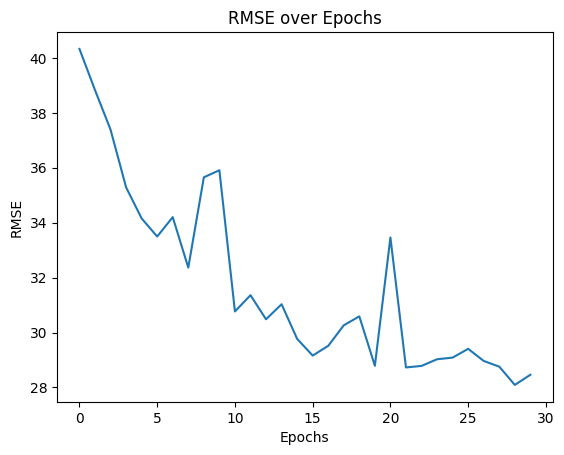


Minimum RMSE: 28.092136267087294
Minimum MAE: 16.69657207144539
Minimum WMAPE: 0.09528195137631906
Total time: 362.907329082489


In [ ]:
import numpy as np
import csv
from dataLoad import Get_All_Data
from gcnLayer import GraphConvolution1
from mt import evaluate_performance
import matplotlib.pyplot as plt
from keras.layers import Input, Reshape, Conv3D, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2
import time
import keras
begintime = time.time()

# Load data
X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2 = \
    Get_All_Data(TG=10, time_lag=11, TG_in_one_day=36, forecast_day_number=5, TG_in_one_week=180)

# Load adjacency matrix
adjacency = []
with open('adjacency.csv') as f:
    data = csv.reader(f, delimiter=",")
    for line in data:
        line = [float(x) for x in line]
        adjacency.append(line)
adjacency = np.array(adjacency)

print("Adjacency shape:", adjacency.shape)

# Define model
input1 = Input(shape=(X_train_1.shape[1], X_train_1.shape[2]))
out1 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input1)
out1 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out1)

input2 = Input(shape=(X_train_2.shape[1], X_train_2.shape[2]), name='input2')
out2 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input2)
out2 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out2)

out = keras.layers.concatenate([out1, out2], axis=4)
out = Conv3D(16, kernel_size=3, padding='same', activation='relu')(out)
out = Flatten()(out)
out = Dense(276)(out)

model = Model(inputs=[input1, input2], outputs=[out])
model.compile(loss='mse', optimizer=Adam(lr=0.001))

print("Model compiled")

def fit10():
    model.fit([X_train_1, X_train_2], Y_train, batch_size=64, epochs=20, verbose=1)
    Y_test_pre = model.predict([X_test_1, X_test_2], verbose=1)
    Y_test_pre = Y_test_pre.reshape(-1, 276)
    Y_test_pre = Y_test_pre * a
    model.save_weights('my_model_weights.h5')
    return evaluate_performance(Y_test_original, Y_test_pre)

# Train model
model.fit([X_train_1, X_train_2], Y_train, batch_size=64, epochs=10, verbose=1)
model.save_weights('my_model_weights.h5')

# Evaluate model
RMSEs, R2s, MAEs, WMAPEs = [], [], [], []
epochNum = 30
for i in range(epochNum):
    print(f"Epoch {i+1}/{epochNum}")
    RMSE, R2, MAE, WMAPE = fit10()
    RMSEs.append(RMSE)
    R2s.append(R2)
    MAEs.append(MAE)
    WMAPEs.append(WMAPE)

plt.plot(RMSEs)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE over Epochs')

plt.show()

print("\nMinimum RMSE:", min(RMSEs))
print("Minimum MAE:", min(MAEs))
print("Minimum WMAPE:", min(WMAPEs))

totaltime = time.time() - begintime
print("Total time:", totaltime)


# 15 **MINS**

X_train_1.shape,Y_train.shape
(1430, 276, 30) (1430, 276)
X_test_1.shape,Y_test.shape
(170, 276, 30) (170, 276)
Y_test_original.shape
(170, 276)
4744 0
(1430, 276, 30)
(170, 276, 30)
Adjacency shape: (276, 276)


Model compiled
Epoch 1/10
23/23 [==============================] - 2s 20ms/step - loss: 0.0258
Epoch 2/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0179
Epoch 3/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0153
Epoch 4/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0133
Epoch 5/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0116
Epoch 6/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0101
Epoch 7/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0088
Epoch 8/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0076
Epoch 9/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0065
Epoch 10/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0057
Epoch 1/30
Epoch 1/20
23/23 [==============================] - 0s 15ms/step - loss: 0.0049
Epoch 2/20
23/23 [==============================] - 0s 12ms/step - loss: 0.0042
Epoch 3/20
23

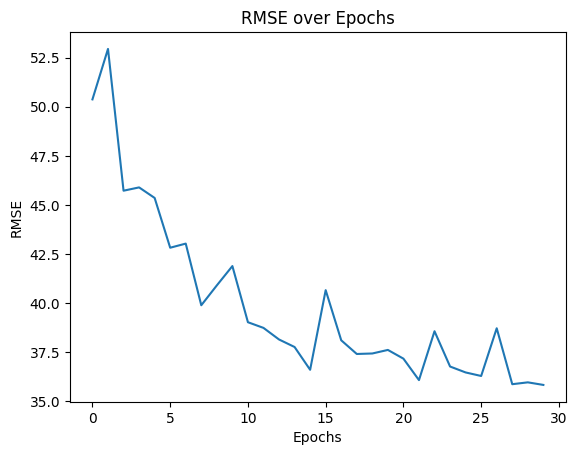


Minimum RMSE: 35.8291734351201
Minimum MAE: 21.479218471389554
Minimum WMAPE: 0.07931311345314876
Total time: 285.78231930732727


In [ ]:
import numpy as np
import csv
from dataLoad import Get_All_Data
from gcnLayer import GraphConvolution1
from mt import evaluate_performance
import matplotlib.pyplot as plt
from keras.layers import Input, Reshape, Conv3D, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2
import time
import keras
begintime = time.time()

# Load data
X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2 = \
    Get_All_Data(TG=15, time_lag=11, TG_in_one_day=36, forecast_day_number=5, TG_in_one_week=180)

# Load adjacency matrix
adjacency = []
with open('adjacency.csv') as f:
    data = csv.reader(f, delimiter=",")
    for line in data:
        line = [float(x) for x in line]
        adjacency.append(line)
adjacency = np.array(adjacency)

print("Adjacency shape:", adjacency.shape)

# Define model
input1 = Input(shape=(X_train_1.shape[1], X_train_1.shape[2]))
out1 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input1)
out1 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out1)

input2 = Input(shape=(X_train_2.shape[1], X_train_2.shape[2]), name='input2')
out2 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input2)
out2 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out2)

out = keras.layers.concatenate([out1, out2], axis=4)
out = Conv3D(16, kernel_size=3, padding='same', activation='relu')(out)
out = Flatten()(out)
out = Dense(276)(out)

model = Model(inputs=[input1, input2], outputs=[out])
model.compile(loss='mse', optimizer=Adam(lr=0.001))

print("Model compiled")

def fit10():
    model.fit([X_train_1, X_train_2], Y_train, batch_size=64, epochs=20, verbose=1)
    Y_test_pre = model.predict([X_test_1, X_test_2], verbose=1)
    Y_test_pre = Y_test_pre.reshape(-1, 276)
    Y_test_pre = Y_test_pre * a
    model.save_weights('my_model_weights.h5')
    return evaluate_performance(Y_test_original, Y_test_pre)

# Train model
model.fit([X_train_1, X_train_2], Y_train, batch_size=64, epochs=10, verbose=1)
model.save_weights('my_model_weights.h5')

# Evaluate model
RMSEs, R2s, MAEs, WMAPEs = [], [], [], []
epochNum = 30
for i in range(epochNum):
    print(f"Epoch {i+1}/{epochNum}")
    RMSE, R2, MAE, WMAPE = fit10()
    RMSEs.append(RMSE)
    R2s.append(R2)
    MAEs.append(MAE)
    WMAPEs.append(WMAPE)

plt.plot(RMSEs)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE over Epochs')
plt.show()

print("\nMinimum RMSE:", min(RMSEs))
print("Minimum MAE:", min(MAEs))
print("Minimum WMAPE:", min(WMAPEs))

totaltime = time.time() - begintime
print("Total time:", totaltime)


# 30 **MINS**

X_train_1.shape,Y_train.shape
(530, 276, 30) (530, 276)
X_test_1.shape,Y_test.shape
(170, 276, 30) (170, 276)
Y_test_original.shape
(170, 276)
8940 0
(530, 276, 30)


(170, 276, 30)
Adjacency shape: (276, 276)
Model compiled
Epoch 1/10
9/9 [==============================] - 2s 17ms/step - loss: 0.0283
Epoch 2/10
9/9 [==============================] - 0s 16ms/step - loss: 0.0213
Epoch 3/10
9/9 [==============================] - 0s 14ms/step - loss: 0.0190
Epoch 4/10
9/9 [==============================] - 0s 12ms/step - loss: 0.0173
Epoch 5/10
9/9 [==============================] - 0s 12ms/step - loss: 0.0159
Epoch 6/10
9/9 [==============================] - 0s 12ms/step - loss: 0.0148
Epoch 7/10
9/9 [==============================] - 0s 12ms/step - loss: 0.0138
Epoch 8/10
9/9 [==============================] - 0s 12ms/step - loss: 0.0129
Epoch 9/10
9/9 [==============================] - 0s 14ms/step - loss: 0.0121
Epoch 10/10
9/9 [==============================] - 0s 12ms/step - loss: 0.0113
Epoch 1/30
Epoch 1/20
9/9 [==============================] - 0s 12ms/step - loss: 0.0106
Epoch 2/20
9/9 [==============================] - 0s 12ms/step - loss: 0

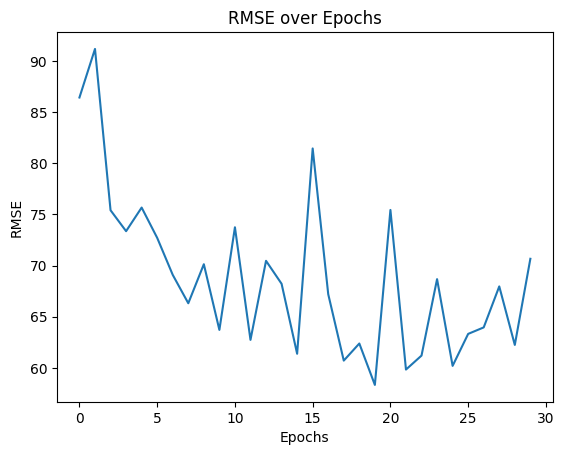


Minimum RMSE: 58.329693293212905
Minimum MAE: 33.351209991233844
Minimum WMAPE: 0.06467571218260877
Total time: 118.92985153198242


In [ ]:
import numpy as np
import csv
from dataLoad import Get_All_Data
from modglayer import GraphConvolution1
from mt import evaluate_performance
import matplotlib.pyplot as plt
from keras.layers import Input, Reshape, Conv3D, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2
import time
import keras
begintime = time.time()

# Load data
X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2 = \
    Get_All_Data(TG=30, time_lag=11, TG_in_one_day=36, forecast_day_number=5, TG_in_one_week=180)

# Load adjacency matrix
adjacency = []
with open('adjacency.csv') as f:
    data = csv.reader(f, delimiter=",")
    for line in data:
        line = [float(x) for x in line]
        adjacency.append(line)
adjacency = np.array(adjacency)

print("Adjacency shape:", adjacency.shape)

# Define model
input1 = Input(shape=(X_train_1.shape[1], X_train_1.shape[2]))
out1 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input1)
out1 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out1)

input2 = Input(shape=(X_train_2.shape[1], X_train_2.shape[2]), name='input2')
out2 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input2)
out2 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out2)

out = keras.layers.concatenate([out1, out2], axis=4)
out = Conv3D(16, kernel_size=3, padding='same', activation='relu')(out)
out = Flatten()(out)
out = Dense(276)(out)

model = Model(inputs=[input1, input2], outputs=[out])
model.compile(loss='mse', optimizer=Adam(lr=0.001))

print("Model compiled")

def fit10():
    model.fit([X_train_1, X_train_2], Y_train, batch_size=64, epochs=20, verbose=1)
    Y_test_pre = model.predict([X_test_1, X_test_2], verbose=1)
    Y_test_pre = Y_test_pre.reshape(-1, 276)
    Y_test_pre = Y_test_pre * a
    model.save_weights('my_model_weights.h5')
    return evaluate_performance(Y_test_original, Y_test_pre)

# Train model
model.fit([X_train_1, X_train_2], Y_train, batch_size=64, epochs=10, verbose=1)
model.save_weights('my_model_weights.h5')

# Evaluate model
RMSEs, R2s, MAEs, WMAPEs = [], [], [], []
epochNum = 30
for i in range(epochNum):
    print(f"Epoch {i+1}/{epochNum}")
    RMSE, R2, MAE, WMAPE = fit10()
    RMSEs.append(RMSE)
    R2s.append(R2)
    MAEs.append(MAE)
    WMAPEs.append(WMAPE)

plt.plot(RMSEs)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE over Epochs')
plt.show()

print("\nMinimum RMSE:", min(RMSEs))
print("Minimum MAE:", min(MAEs))
print("Minimum WMAPE:", min(WMAPEs))

totaltime = time.time() - begintime
print("Total time:", totaltime)
